In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_transactions = pd.read_csv('transactions.csv')
df_transactions.head()

,id,date,days_after_open,day_of_week,hours_after_open,drink_id,name,unit_price,quantity,raining,study_area_id,study_area_name,dist_to_cafe
0,0,2019-07-22,0,Mon,0,5,Flat White (L),4.9,1,No,3,Abercrombie (H70),700
1,1,2019-07-22,0,Mon,0,5,Flat White (L),4.9,1,No,1,Law Library (F10),84
2,2,2019-07-22,0,Mon,0,2,Macchiato,3.8,1,No,1,Law Library (F10),84
3,3,2019-07-22,0,Mon,0,2,Macchiato,3.8,1,No,5,Carslaw (F07),150
4,4,2019-07-22,0,Mon,0,5,Flat White (L),4.9,1,No,5,Carslaw (F07),150


# Seasonality

## Days

In [3]:
df_transactions['revenue'] = df_transactions['unit_price'] * df_transactions['quantity']

In [4]:
hours_open = 6

total_rev_each_day = df_transactions.groupby(["day_of_week", 'date']).sum()['revenue']
mean_daily_rev = total_rev_each_day.reset_index(level=0).groupby('day_of_week').mean()
mean_daily_rev_ph = mean_daily_rev/hours_open

mean_daily_rev_ph

,revenue
day_of_week,
Fri,154.228030
Mon,145.654545
Sat,145.927273
Sun,149.926515
Thu,166.267424
Tue,157.486364
Wed,177.293939


<BarContainer object of 7 artists>

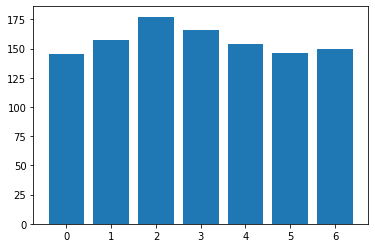

In [5]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

plt.bar(np.arange(0, 7), mean_daily_rev_ph.loc[days]['revenue'])

## Hours

In [6]:
total_rev_each_hour = df_transactions.groupby(["hours_after_open", 'date']).sum()['revenue']
mean_hourly_rev = total_rev_each_hour.reset_index(level=0).groupby('hours_after_open').mean()

mean_hourly_rev

,revenue
hours_after_open,
0,162.827922
1,172.752597
2,166.997403
3,155.794156
4,144.457143
5,138.168627


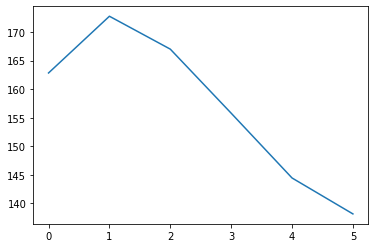

In [7]:
plt.plot(mean_hourly_rev)

# Days Since Opened

In [8]:
daily_revenue = df_transactions.groupby("days_after_open").sum()['revenue']

daily_revenue

days_after_open
0       215.2
1       375.8
2       318.6
3       327.9
4       248.8
        ...  
149    2149.6
150    2142.6
151    1747.2
152    1754.7
153    1880.8
Name: revenue, Length: 154, dtype: float64

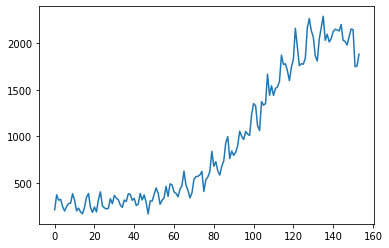

In [9]:
plt.plot(daily_revenue)

# Customer Location

In [10]:
df_transactions

,id,date,days_after_open,day_of_week,hours_after_open,drink_id,name,unit_price,quantity,raining,study_area_id,study_area_name,dist_to_cafe,revenue
0,0,2019-07-22,0,Mon,0,5,Flat White (L),4.9,1,No,3,Abercrombie (H70),700,4.9
1,1,2019-07-22,0,Mon,0,5,Flat White (L),4.9,1,No,1,Law Library (F10),84,4.9
2,2,2019-07-22,0,Mon,0,2,Macchiato,3.8,1,No,1,Law Library (F10),84,3.8
3,3,2019-07-22,0,Mon,0,2,Macchiato,3.8,1,No,5,Carslaw (F07),150,3.8
4,4,2019-07-22,0,Mon,0,5,Flat White (L),4.9,1,No,5,Carslaw (F07),150,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27166,27709,2019-12-22,153,Sun,5,14,Mocha (S),4.5,2,No,3,Abercrombie (H70),700,9.0
27167,27710,2019-12-22,153,Sun,5,6,Flat White (S),4.0,1,Yes,0,Fisher Library (F03),70,4.0
27168,27711,2019-12-22,153,Sun,5,12,Chai Latte (S),3.6,1,No,1,Law Library (F10),84,3.6
27169,27712,2019-12-22,153,Sun,5,9,Cappuccino (L),4.9,1,Yes,1,Law Library (F10),84,4.9


In [11]:
daily_location_rev = df_transactions.groupby(["study_area_name", 'date']).sum()['revenue']
mean_daily_location_rev = daily_location_rev.reset_index(level=0).groupby('study_area_name').mean()

mean_daily_location_rev

,revenue
study_area_name,
Abercrombie (H70),72.194079
Brennan MacCallum (A18),68.655195
Carslaw (F07),164.060390
Fisher Library (F03),261.519481
Law Library (F10),237.569481
Peter Nicol Russell (PNR),71.294118
The Quarter (A16),66.208442


<BarContainer object of 7 artists>

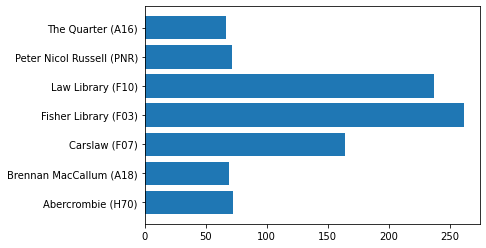

In [12]:
plt.barh(mean_daily_location_rev.index, mean_daily_location_rev['revenue'])